<a href="https://colab.research.google.com/github/kevinxav/homeadv/blob/main/homewwinanalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import t,ttest_ind, ranksums, f, f_oneway

In [4]:
#Importing data
df = pd.read_csv("/content/df_full_premierleague.csv")

In [5]:
#Extracting only required stats and reordering columns
df = df.iloc[:, [2,10,14,15,16,17,19,22,26,27,28,29,31,32,33,35,36]]
df = df[df.columns[[0,1,7,2,8,3,9,5,11,6,12,13,14,15,16]]]
df.iloc[:, 1:] = df.iloc[:, 1:].astype(int)

<ipython-input-5-abe3af8b87a1>:4: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1:] = df.iloc[:, 1:].astype(int)


In [6]:
#Creating columns for wins and combining cards columns
df['home_win'] = df.apply(lambda row: 1 if row['goal_home_ft'] > row['goal_away_ft'] else 0, axis=1)
df['away_win'] = df.apply(lambda row: 1 if row['goal_home_ft'] < row['goal_away_ft'] else 0, axis=1)

In [7]:
#Creating columns for comebacks
df['home_ht_ahead'] = df.apply(lambda row: 1 if row['goal_home_ht'] > row['goal_away_ht'] else 0, axis=1)
df['away_ht_ahead'] = df.apply(lambda row: 1 if row['goal_home_ht'] < row['goal_away_ht'] else 0, axis=1)
df['home_comeback'] = df.apply(lambda row: 1 if row['home_ht_ahead'] < row['away_ht_ahead'] and row['home_win'] == 1 else 0, axis=1)
df['away_comeback'] = df.apply(lambda row: 1 if row['home_ht_ahead'] > row['away_ht_ahead'] and row['away_win'] == 1 else 0, axis=1)

In [8]:
#Combining card columns and dropping unnecessary columns
df['home_cards'] = df['home_yellow_cards'] + df['home_red_cards']
df['away_cards'] = df['away_yellow_cards'] + df['away_red_cards']
df = df[df.columns[[0,1,2,21,22,5,6,7,8,11,12,15,16,19,20]]]
df.to_csv('PL.csv',index = False)
df.head()

,season,home_fouls_conceded,away_fouls_conceded,home_cards,away_cards,home_shots,away_shots,home_tackles,away_tackles,goal_home_ft,goal_away_ft,home_win,away_win,home_comeback,away_comeback
0,10/11,16,13,2,5,26,14,19,15,2,1,1,0,0,0
1,10/11,6,3,1,0,21,12,31,27,3,0,1,0,0,0
2,10/11,9,17,0,4,17,11,27,20,1,0,1,0,0,0
3,10/11,12,14,1,2,21,11,16,20,2,1,1,0,1,0
4,10/11,11,13,2,1,13,25,32,23,0,0,0,0,0,0


In [9]:
#Creating separate dataframes for tests performed below
df1 = df[df['season'] != '20/21']
df21 = df[df['season'] == '20/21']
stats = ['Fouls', 'Cards', 'Shots', 'Tackles', 'Goals', 'Wins', 'Comebacks']
dflabels = ['Season', 'Home Fouls', 'Away Fouls', 'Home Cards', 'Away Cards', 'Home Shots', 'Away Shots', 'Home Tackles',
            'Away Tackles', 'Home Goals', 'Away Goals', 'Home Wins', 'Away Wins', 'Home Comebacks', 'Away Comebacks']
home_df = df[df.columns[[1,3,5,7,9,11,13]]]
away_df = df[df.columns[[2,4,6,8,10,12,14]]]

In [10]:
#Fixing confidence level 95%
alpha = 0.05
tc = t.ppf(q=1-alpha/2, df=len(df)-2)
dfn = 1
dfd = len(df) - 2
fc = f.ppf(1 - alpha, dfn, dfd)

In [11]:
# Perform the t-test for each stat
for i in range(0,5):
    t, p = ttest_ind(home_df[home_df.columns[i]], away_df[away_df.columns[i]], equal_var=False)
    print(stats[i], 't-statistic:', t)
    if abs(t)>tc:
        print('There is a signifincant difference between home and away teams in terms of', stats[i], '\n')
    else:
        print('There is no signifincant difference between home and away teams in terms of', stats[i], '\n')

Fouls t-statistic: -5.661073633207914
There is a signifincant difference between home and away teams in terms of Fouls 

Cards t-statistic: -9.5234327965814
There is a signifincant difference between home and away teams in terms of Cards 

Shots t-statistic: 24.04715428656508
There is a signifincant difference between home and away teams in terms of Shots 

Tackles t-statistic: -2.8077692836727097
There is a signifincant difference between home and away teams in terms of Tackles 

Goals t-statistic: 12.1655624565121
There is a signifincant difference between home and away teams in terms of Goals 



In [12]:
#Performing non-parametric test since data is not normally distributed
for i in range(0,5):
    statistic, pvalue = ranksums(home_df[home_df.columns[i]], away_df[away_df.columns[i]])
    print(stats[i], 'Wilcoxon rank-sum test:', statistic)
    if pvalue<alpha:
        print('There is a signifincant difference between home and away teams in terms of', stats[i], '\n')
    else:
        print('There is no signifincant difference between home and away teams in terms of', stats[i], '\n')

Fouls Wilcoxon rank-sum test: -5.289815919316039
There is a signifincant difference between home and away teams in terms of Fouls 

Cards Wilcoxon rank-sum test: -9.036319214731106
There is a signifincant difference between home and away teams in terms of Cards 

Shots Wilcoxon rank-sum test: 22.751614598743746
There is a signifincant difference between home and away teams in terms of Shots 

Tackles Wilcoxon rank-sum test: -2.710496741626685
There is a signifincant difference between home and away teams in terms of Tackles 

Goals Wilcoxon rank-sum test: 11.698886055425419
There is a signifincant difference between home and away teams in terms of Goals 



In [13]:
#Performing oneway ANOVA
for i in range(0,5):
    statistic, pvalue = f_oneway(home_df[home_df.columns[i]], away_df[away_df.columns[i]])
    print(stats[i], 'ANOVA F value:', statistic)
    if statistic>fc:
        print('There is a signifincant difference between home and away teams in terms of', stats[i], '\n')
    else:
        print('There is no signifincant difference between home and away teams in terms of', stats[i], '\n')

Fouls ANOVA F value: 32.04775468060191
There is a signifincant difference between home and away teams in terms of Fouls 

Cards ANOVA F value: 90.69577223100214
There is a signifincant difference between home and away teams in terms of Cards 

Shots ANOVA F value: 578.2656292818654
There is a signifincant difference between home and away teams in terms of Shots 

Tackles ANOVA F value: 7.883568350336029
There is a signifincant difference between home and away teams in terms of Tackles 

Goals ANOVA F value: 148.00090988329677
There is a signifincant difference between home and away teams in terms of Goals 



In [14]:
#Estimating mean statistics for home team
for i in range(0,5):
    sample_mean = home_df[home_df.columns[i]].mean()
    sample_std = home_df[home_df.columns[i]].std()
    n = len(df)
    standard_error = sample_std / np.sqrt(n)
    margin_of_error = tc * standard_error
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    print('Home', stats[i], sample_mean)
    print('Confidence Interval:', confidence_interval, '\n')

Home Fouls 10.778624078624079
Confidence Interval: (10.673077109180626, 10.88417104806753) 

Home Cards 1.5545454545454545
Confidence Interval: (1.516981931988705, 1.592108977102204) 

Home Shots 14.545454545454545
Confidence Interval: (14.368179600681515, 14.722729490227575) 

Home Tackles 17.96117936117936
Confidence Interval: (17.78859685801518, 18.133761864343544) 

Home Goals 1.5356265356265357
Confidence Interval: (1.4955433198313295, 1.575709751421742) 



In [15]:
#Estimating mean statistics for away team
for i in range(0,5):
    sample_mean = away_df[away_df.columns[i]].mean()
    sample_std = away_df[away_df.columns[i]].std()
    n = len(df)
    standard_error = sample_std / np.sqrt(n)
    margin_of_error = tc * standard_error
    confidence_interval = (sample_mean - margin_of_error, sample_mean + margin_of_error)
    print('Away', stats[i], sample_mean)
    print('Confidence Interval:', confidence_interval, '\n')

Away Fouls 11.218427518427518
Confidence Interval: (11.108613559266592, 11.328241477588444) 

Away Cards 1.8221130221130222
Confidence Interval: (1.781825128958344, 1.8624009152677004) 

Away Shots 11.694103194103194
Confidence Interval: (11.543719478560941, 11.844486909645447) 

Away Tackles 18.31277641277641
Confidence Interval: (18.138167695409454, 18.48738513014337) 

Away Goals 1.2007371007371008
Confidence Interval: (1.1645982240398316, 1.23687597743437) 



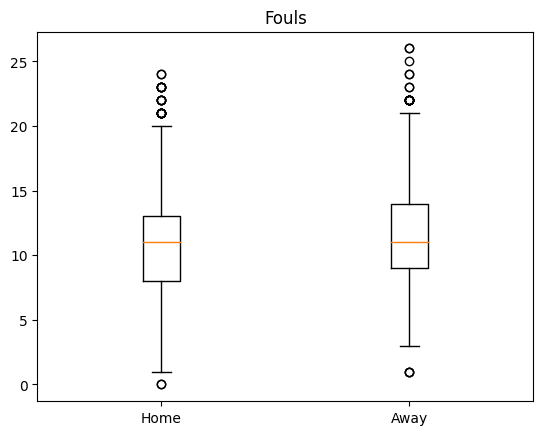

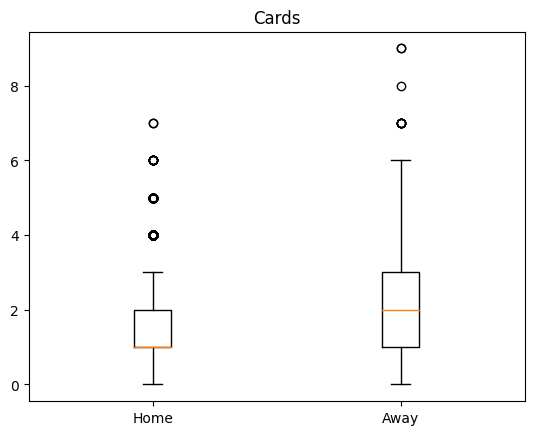

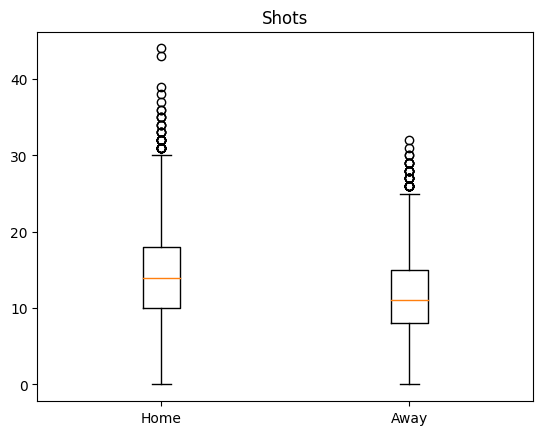

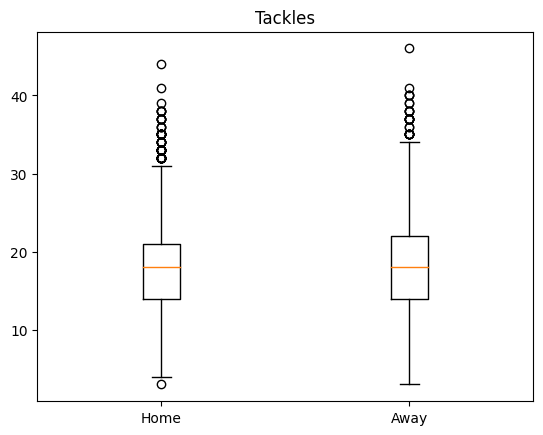

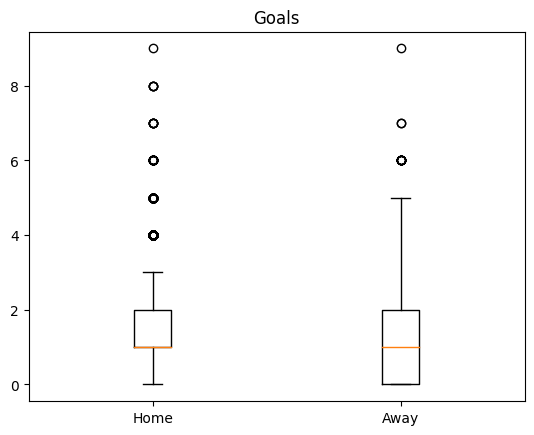

In [16]:
#Creating box plots for each statistic
box_data = []
for i in range(0, 5):
    home_data = home_df[home_df.columns[i]]
    away_data = away_df[away_df.columns[i]]
    box_data.append(home_data)
    box_data.append(away_data)
    plt.boxplot(box_data)
    plt.xticks([1, 2], ['Home', 'Away'])
    plt.title(stats[i])
    plt.show()
    box_data = []

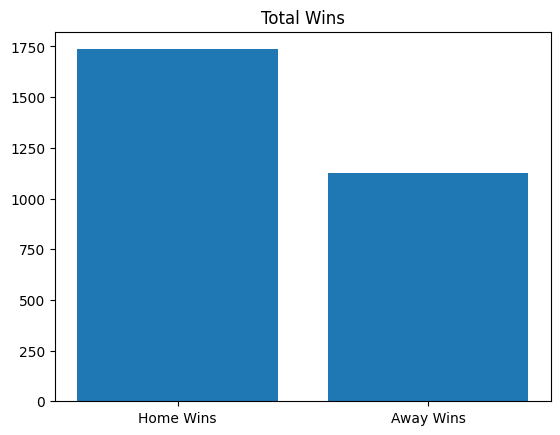

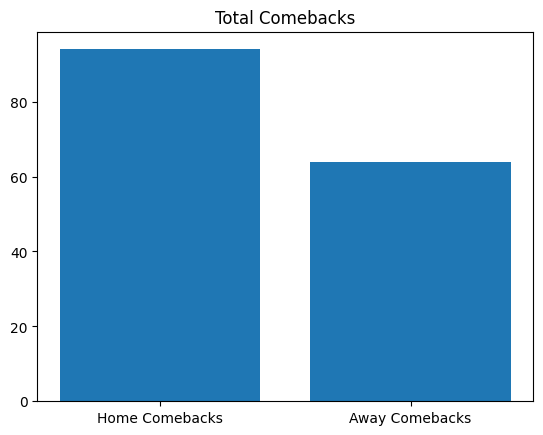

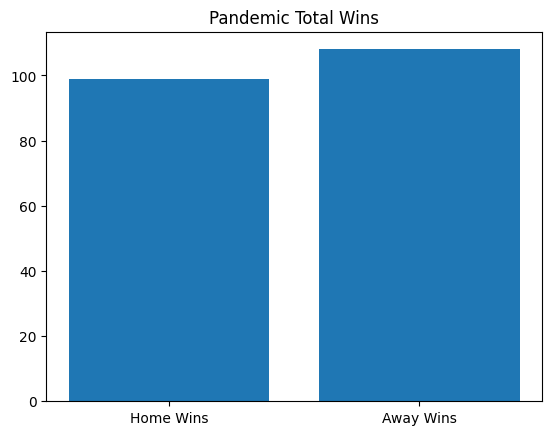

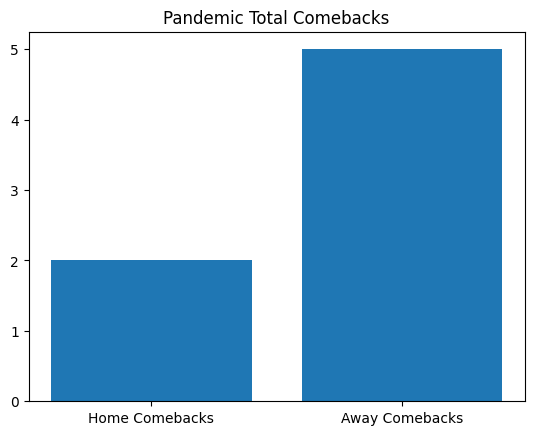

In [17]:
home_wins = df1['home_win'].sum()
away_wins = df1['away_win'].sum()
home_comebacks = df1['home_comeback'].sum()
away_comebacks = df1['away_comeback'].sum()
home_wins2 = df21['home_win'].sum()
away_wins2 = df21['away_win'].sum()
home_comebacks2 = df21['home_comeback'].sum()
away_comebacks2 = df21['away_comeback'].sum()
fig, ax = plt.subplots()
ax.bar(['Home Wins', 'Away Wins'], [home_wins, away_wins])
ax.set_title('Total Wins')
plt.show()
fig, ax = plt.subplots()
ax.bar(['Home Comebacks', 'Away Comebacks'], [home_comebacks, away_comebacks])
ax.set_title('Total Comebacks')
plt.show()
fig, ax = plt.subplots()
ax.bar(['Home Wins', 'Away Wins'], [home_wins2, away_wins2])
ax.set_title('Pandemic Total Wins')
plt.show()
fig, ax = plt.subplots()
ax.bar(['Home Comebacks', 'Away Comebacks'], [home_comebacks2, away_comebacks2])
ax.set_title('Pandemic Total Comebacks')
plt.show()